<img src="https://raw.githubusercontent.com/ProjectPythiaCookbooks/radar-cookbook/main/thumbnail.png" width=500 alt="ARM Logo"></img>

# Plot Aerosol and Meteorological Data from SAIL

## Overview
   
Within this notebook, we will cover:

1. How to access aerosol and meteorological data using ACT
1. How to plot the data using ACT

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [ACT Basics](./act-basics.ipynb) | Helpful | Data access and working with ARM data |

- **Time to learn**: 30 minutes
---

## Imports

In [1]:
import act
import matplotlib.pyplot as plt
import numpy as np

## Search and Access the Data Using the ARMLive API

### Access Aerosol Data

In [2]:
username = 'armlive_training'
token = '6f097a7b99e39d19'
startdate = '20220801'

datastream = 'gucaosacsmtofspecS2.b1'

files = act.discovery.download_data(username, token, datastream, startdate, startdate)

aeorosol_ds = act.io.read_netcdf(files)

[DOWNLOADING] gucaosacsmtofspecS2.b1.20220801.000742.nc


### Access Meteorological Data

In [3]:
datastream = 'gucmetM1.b1'

files = act.discovery.download_data(username, token, datastream, startdate, startdate)

met_ds = act.io.read_netcdf(files)

[DOWNLOADING] gucmetM1.b1.20220801.000000.cdf


## Plot our Display with a Wind Rose and Timeseries

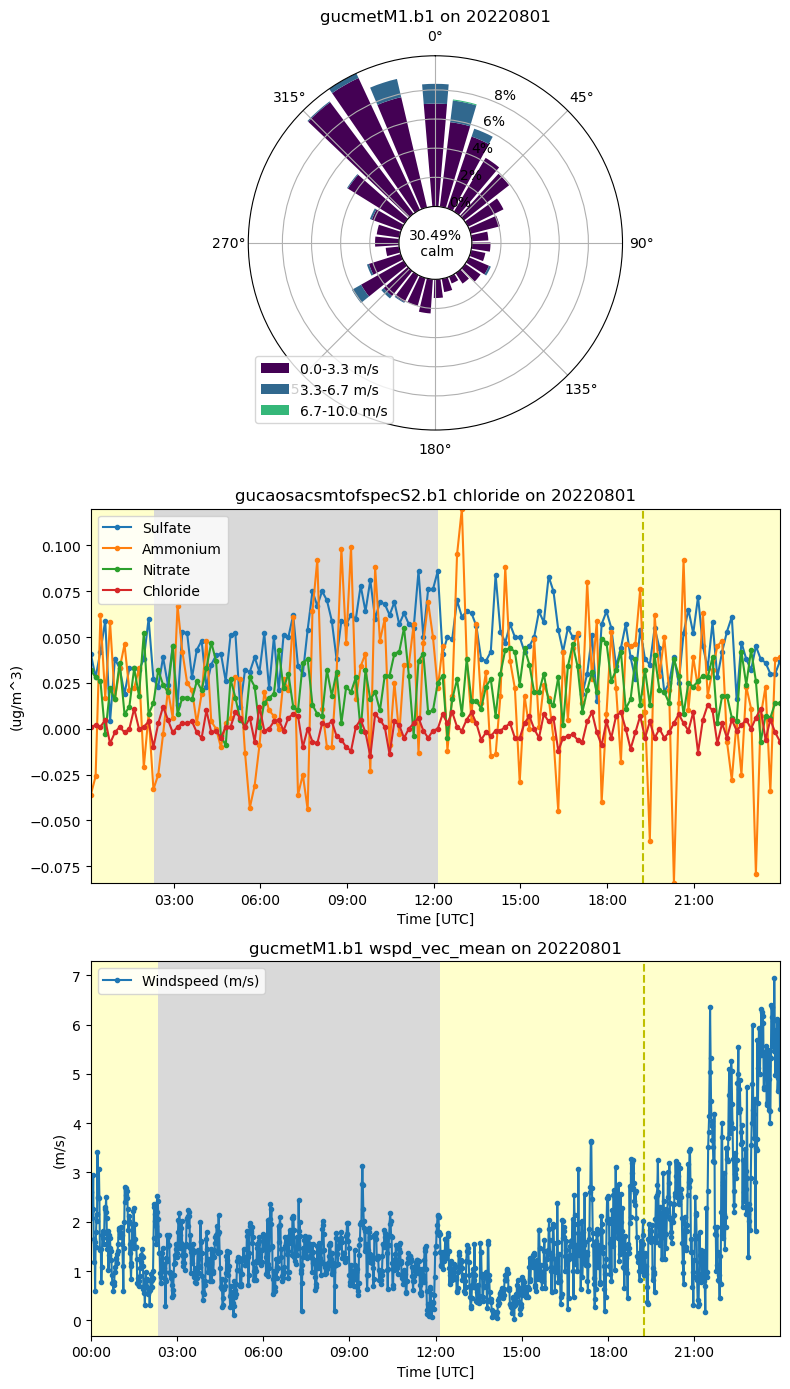

In [4]:
WindDisplay = act.plotting.WindRoseDisplay(met_ds, figsize=(8, 14), subplot_shape=(3,))
WindDisplay.plot(
    'wdir_vec_mean', 'wspd_vec_mean', spd_bins=np.linspace(0, 10, 4),
    num_dirs=30, tick_interval=2, subplot_index=(0,))

TimeAosDisplay = act.plotting.TimeSeriesDisplay(aeorosol_ds)
WindDisplay.put_display_in_subplot(TimeAosDisplay, subplot_index=(1,))
TimeAosDisplay.plot('sulfate', label='Sulfate')
TimeAosDisplay.plot('ammonium', label='Ammonium')
TimeAosDisplay.plot('nitrate', label='Nitrate')
TimeAosDisplay.plot('chloride', label='Chloride')
TimeAosDisplay.day_night_background()

TimeMetDisplay = act.plotting.TimeSeriesDisplay(met_ds)
WindDisplay.put_display_in_subplot(TimeMetDisplay, subplot_index=(2,))
TimeMetDisplay.plot('wspd_vec_mean', label='Windspeed (m/s)')
TimeMetDisplay.day_night_background()
plt.tight_layout()